In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [138]:
df=pd.read_csv(r'C:\Users\sudip\OneDrive\Desktop\fifa wc\WorldCupMatches.csv',encoding='unicode_escape')

In [207]:
df.shape

(10, 21)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2          

In [143]:
pd.isnull(df).sum()

Year                    3720
Datetime                3720
Stage                   3720
Stadium                 3720
City                    3720
Home Team Name          3720
Home Team Goals         3720
Away Team Goals         3720
Away Team Name          3720
Win conditions          3720
Attendance              3722
Half-time Home Goals    3720
Half-time Away Goals    3720
Referee                 3720
Assistant 1             3720
Assistant 2             3720
RoundID                 3720
MatchID                 3720
Home Team Initials      3720
Away Team Initials      3720
dtype: int64

In [206]:
df.shape

(10, 21)

In [145]:
pd.isnull(df).sum()

Year                    0
Datetime                0
Stage                   0
Stadium                 0
City                    0
Home Team Name          0
Home Team Goals         0
Away Team Goals         0
Away Team Name          0
Win conditions          0
Attendance              0
Half-time Home Goals    0
Half-time Away Goals    0
Referee                 0
Assistant 1             0
Assistant 2             0
RoundID                 0
MatchID                 0
Home Team Initials      0
Away Team Initials      0
dtype: int64

In [146]:
df['Year']=df['Year'].astype('int')

In [204]:
df.shape

(10, 21)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 850 entries, 0 to 851
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  850 non-null    int32  
 1   Datetime              850 non-null    object 
 2   Stage                 850 non-null    object 
 3   Stadium               850 non-null    object 
 4   City                  850 non-null    object 
 5   Home Team Name        850 non-null    object 
 6   Home Team Goals       850 non-null    float64
 7   Away Team Goals       850 non-null    float64
 8   Away Team Name        850 non-null    object 
 9   Win conditions        850 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  850 non-null    float64
 12  Half-time Away Goals  850 non-null    float64
 13  Referee               850 non-null    object 
 14  Assistant 1           850 non-null    object 
 15  Assistant 2           850 no

In [149]:
df['Home Team Goals']=df['Home Team Goals'].astype('int')

In [155]:
df['Away Team Goals']=df['Away Team Goals'].astype('int')

In [152]:
df.columns = df.columns.str.strip()


In [154]:
df['Attendance']=df['Attendance'].astype('int')

In [156]:
df['RoundID']=df['RoundID'].astype('int')

In [157]:
df['MatchID']=df['MatchID'].astype('int')

In [185]:
df.head

<bound method NDFrame.head of      Year              Datetime           Stage               Stadium  \
708  2010  11 Jun 2010 - 16:00          Group A   Soccer City Stadium   
730  2010  18 Jun 2010 - 20:30          Group C     Cape Town Stadium   
743  2010  22 Jun 2010 - 20:30          Group B  Peter Mokaba Stadium   
766  2010  03 Jul 2010 - 16:00   Quarter-finals     Cape Town Stadium   
768  2010  06 Jul 2010 - 20:30      Semi-finals     Cape Town Stadium   
780  2014  15 Jun 2014 - 13:00          Group E      Estadio Nacional   
807  2014  23 Jun 2014 - 17:00          Group A      Arena Pernambuco   
816  2014  26 Jun 2014 - 13:00          Group G      Arena Pernambuco   
830  2014  05 Jul 2014 - 17:00   Quarter-finals      Arena Fonte Nova   
847  2014  05 Jul 2014 - 17:00   Quarter-finals      Arena Fonte Nova   

              City Home Team Name  Home Team Goals  Away Team Goals  \
708  Johannesburg    South Africa                1                1   
730     Cape Town       

In [159]:
total_matches = len(df)
total_goals = df['Home Team Goals'].sum() + df['Away Team Goals'].sum()
average_goals_per_match = total_goals / total_matches
average_attendance_per_match = df['Attendance'].mean()

print("Total matches:", total_matches)
print("Total goals:", total_goals)
print("Average goals per match:", average_goals_per_match)
print("Average attendance per match:", average_attendance_per_match)

Total matches: 850
Total goals: 2408
Average goals per match: 2.8329411764705883
Average attendance per match: 45164.8


In [160]:
# Performance Analysis
home_wins = df[df['Home Team Goals'] > df['Away Team Goals']]
away_wins = df[df['Home Team Goals'] < df['Away Team Goals']]
draws = df[df['Home Team Goals'] == df['Away Team Goals']]

home_win_rate = len(home_wins) / total_matches
away_win_rate = len(away_wins) / total_matches
draw_rate = len(draws) / total_matches

print("Home win rate:", home_win_rate)
print("Away win rate:", away_win_rate)
print("Draw rate:", draw_rate)

Home win rate: 0.571764705882353
Away win rate: 0.20470588235294118
Draw rate: 0.2235294117647059


TypeError: sort_values() got an unexpected keyword argument 'by'

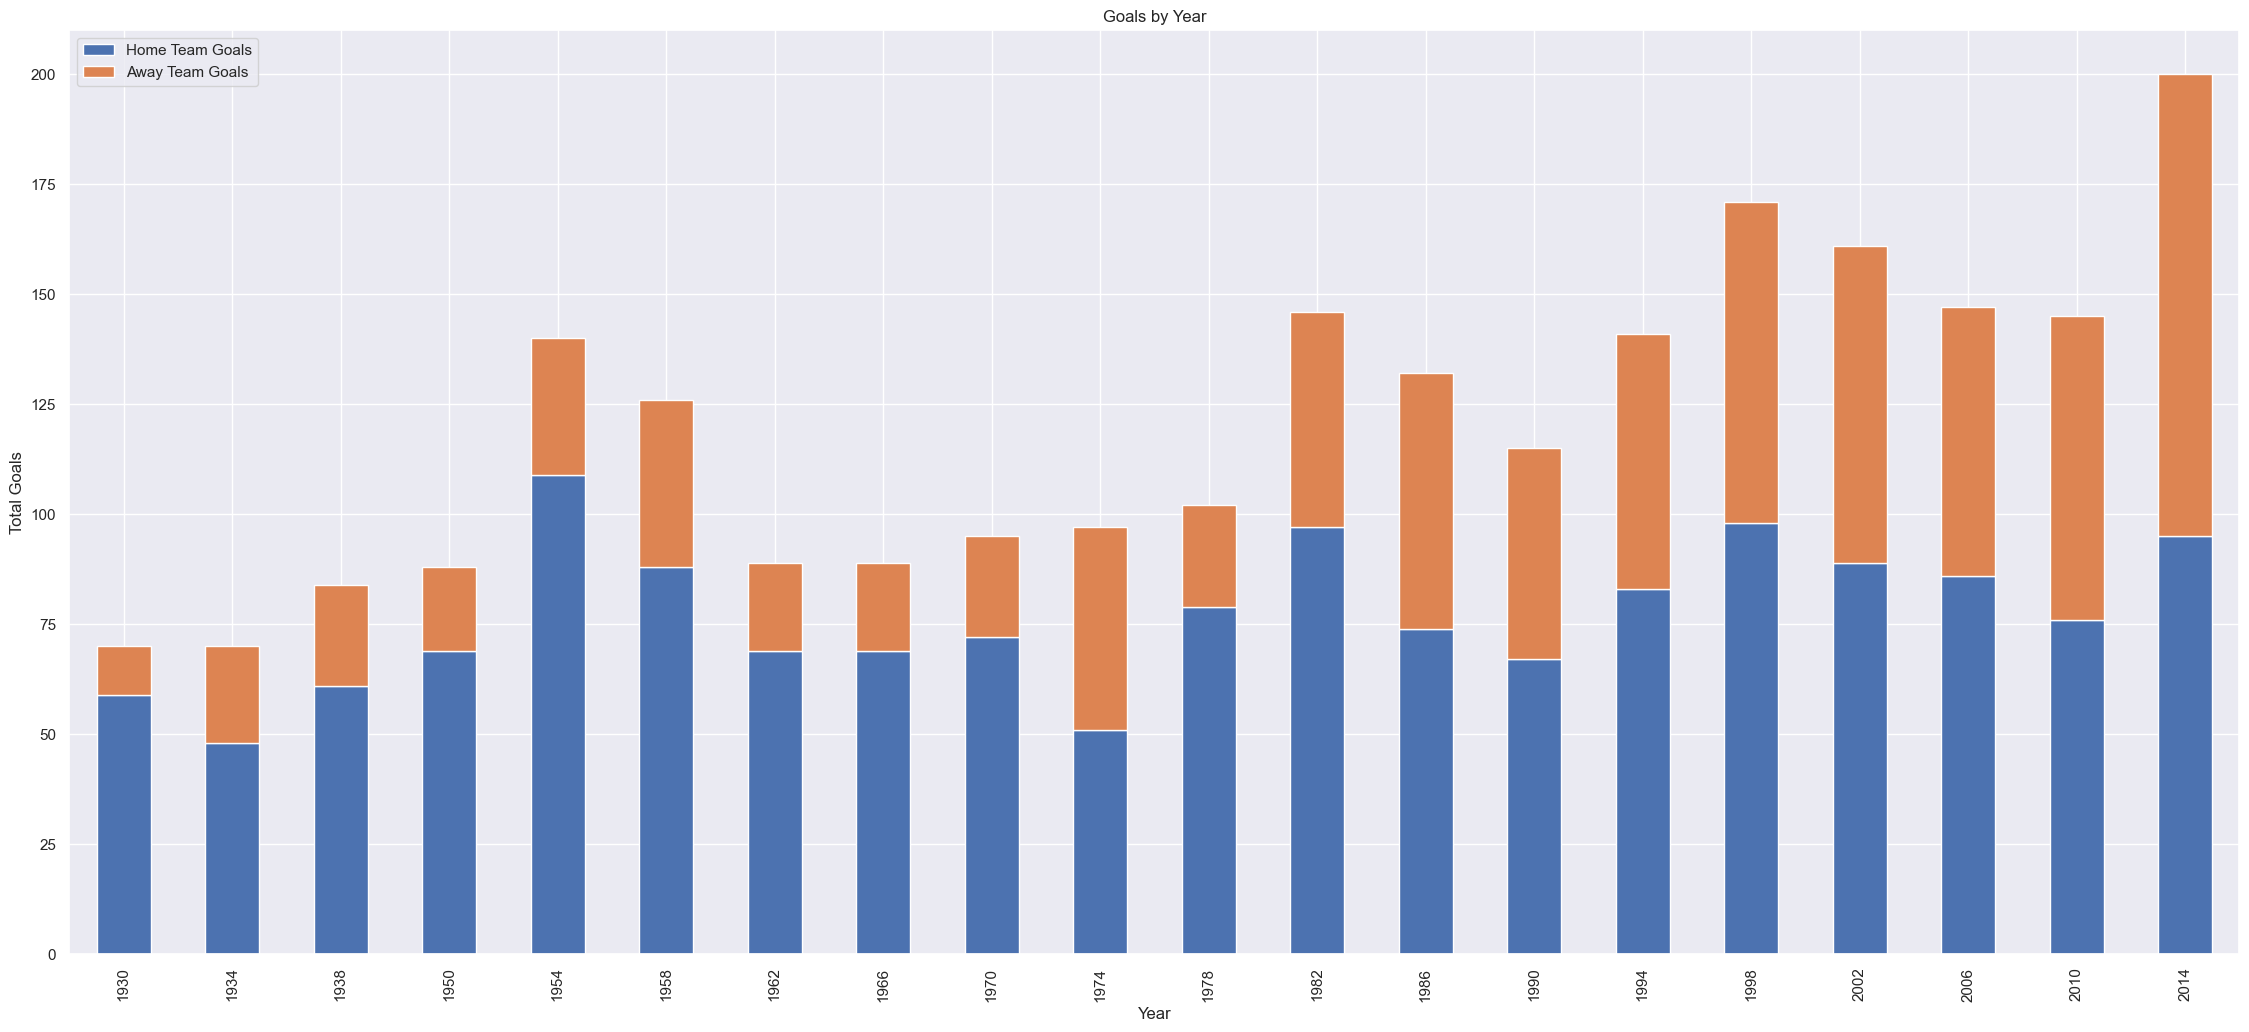

In [164]:
# Goals Analysis
goals_by_year = df.groupby('Year')[['Home Team Goals', 'Away Team Goals']].sum()
goals_by_year.plot(kind='bar', stacked=True, title='Goals by Year')
plt.xlabel('Year')
plt.ylabel('Total Goals')
plt.show()

In [165]:
# Top 5 matches with highest attendance
top_attendance_matches = df.nlargest(5, 'Attendance')[['Year', 'Home Team Name', 'Away Team Name', 'Attendance']]
print("Top 5 matches with highest attendance:\n", top_attendance_matches)

Top 5 matches with highest attendance:
      Year Home Team Name Away Team Name  Attendance
74   1950        Uruguay         Brazil      173850
71   1950         Brazil          Spain      152772
63   1950         Brazil     Yugoslavia      142429
70   1950         Brazil         Sweden      138886
379  1986         Mexico       Paraguay      114600


In [166]:
# Half-time vs Full-time Goals
half_time_goals = df['Half-time Home Goals'].sum() + df['Half-time Away Goals'].sum()
full_time_goals = df['Home Team Goals'].sum() + df['Away Team Goals'].sum()

In [167]:
print("Total half-time goals:", half_time_goals)
print("Total full-time goals:", full_time_goals)

Total half-time goals: 969.0
Total full-time goals: 2408


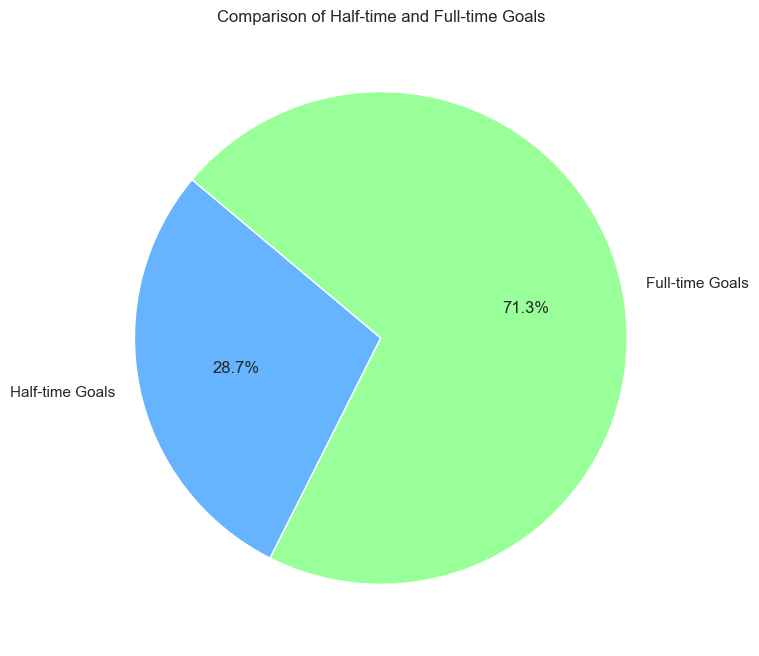

In [168]:
goals = [half_time_goals, full_time_goals]
labels = ['Half-time Goals', 'Full-time Goals']

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(goals, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99'])
plt.title('Comparison of Half-time and Full-time Goals')
plt.show()

In [172]:
# Referee Analysis
referee_match_counts = df['Referee'].value_counts().head(10)
print("Top 10 referees by number of matches officiated:\n", referee_match_counts)


Top 10 referees by number of matches officiated:
 Referee
Ravshan IRMATOV (UZB)       10
QUINIOU Joel (FRA)           8
RODRIGUEZ Marco (MEX)        8
LARRIONDA Jorge (URU)        8
ARCHUNDIA Benito (MEX)       8
GRIFFITHS Benjamin (WAL)     7
DE BLEECKERE Frank (BEL)     7
BUJSAIM Ali (UAE)            7
WEBB Howard (ENG)            7
LANGENUS Jean (BEL)          7
Name: count, dtype: int64


In [174]:
df1=df[df['Referee']=='Ravshan IRMATOV (UZB)']

In [186]:
df1.head

<bound method NDFrame.head of      Year              Datetime           Stage               Stadium  \
708  2010  11 Jun 2010 - 16:00          Group A   Soccer City Stadium   
730  2010  18 Jun 2010 - 20:30          Group C     Cape Town Stadium   
743  2010  22 Jun 2010 - 20:30          Group B  Peter Mokaba Stadium   
766  2010  03 Jul 2010 - 16:00   Quarter-finals     Cape Town Stadium   
768  2010  06 Jul 2010 - 20:30      Semi-finals     Cape Town Stadium   
780  2014  15 Jun 2014 - 13:00          Group E      Estadio Nacional   
807  2014  23 Jun 2014 - 17:00          Group A      Arena Pernambuco   
816  2014  26 Jun 2014 - 13:00          Group G      Arena Pernambuco   
830  2014  05 Jul 2014 - 17:00   Quarter-finals      Arena Fonte Nova   
847  2014  05 Jul 2014 - 17:00   Quarter-finals      Arena Fonte Nova   

              City Home Team Name  Home Team Goals  Away Team Goals  \
708  Johannesburg    South Africa                1                1   
730     Cape Town       

In [180]:
# Group by 'Stage' and perform analysis
stage_analysis = df.groupby('Stage').agg({
    'Home Team Goals': ['sum', 'mean'],
    'Away Team Goals': ['sum', 'mean'],
    'MatchID': ['count']

}).rename(columns={'MatchID': 'Number of Matches'})
# Flatten MultiIndex columns
stage_analysis.columns = [' '.join(col).strip() for col in stage_analysis.columns.values]

# Print the analysis
print(stage_analysis)

                Home Team Goals sum  Home Team Goals mean  \
Stage                                                       
Group A                           2                   1.0   
Group B                           0                   0.0   
Group C                           0                   0.0   
Group E                           2                   2.0   
Group G                           0                   0.0   
Quarter-finals                    0                   0.0   
Semi-finals                       2                   2.0   

                Away Team Goals sum  Away Team Goals mean  \
Stage                                                       
Group A                           4              2.000000   
Group B                           2              2.000000   
Group C                           0              0.000000   
Group E                           1              1.000000   
Group G                           1              1.000000   
Quarter-finals         

In [182]:
# Group by 'RoundID' and perform analysis
round_analysis = df.groupby('RoundID').agg({
    'Home Team Goals': ['sum', 'mean'],
    'Away Team Goals': ['sum', 'mean'],
    'MatchID': 'count',
    'Home Team Result': lambda x: (x == 'Win').sum() / x.size,  # Win rate for home team
}).rename(columns={'MatchID': 'Number of Matches'})

# Flatten MultiIndex columns
round_analysis.columns = [' '.join(col).strip() for col in round_analysis.columns.values]

# Print the analysis
print(round_analysis)


         Home Team Goals sum  Home Team Goals mean  Away Team Goals sum  \
RoundID                                                                   
249718                     0              0.000000                    4   
249719                     2              2.000000                    3   
249722                     1              0.333333                    3   
255931                     3              1.000000                    5   
255953                     0              0.000000                    0   

         Away Team Goals mean  Number of Matches count  \
RoundID                                                  
249718               4.000000                        1   
249719               3.000000                        1   
249722               1.000000                        3   
255931               1.666667                        3   
255953               0.000000                        2   

         Home Team Result <lambda>  
RoundID                       

In [187]:

# Group by 'City' and perform analysis
city_analysis = df.groupby('City').agg({
    'MatchID': 'count',
    'Attendance': ['sum', 'mean'],
    'Home Team Goals': ['sum', 'mean'],
    'Away Team Goals': ['sum', 'mean'],
    'Home Team Result': lambda x: (x == 'Win').sum() / x.size  # Home win rate
}).rename(columns={'MatchID': 'Number of Matches'})

# Flatten MultiIndex columns
city_analysis.columns = [' '.join(col).strip() for col in city_analysis.columns.values]

# Print the analysis
print(city_analysis)

               Number of Matches count  Attendance sum  Attendance mean  \
City                                                                      
Brasilia                             1           68351     68351.000000   
Cape Town                            3          190679     63559.666667   
Johannesburg                         1           84490     84490.000000   
Polokwane                            1           38891     38891.000000   
Recife                               2           83088     41544.000000   
Salvador                             2          102358     51179.000000   

               Home Team Goals sum  Home Team Goals mean  Away Team Goals sum  \
City                                                                            
Brasilia                         2              2.000000                    1   
Cape Town                        2              0.666667                    7   
Johannesburg                     1              1.000000                   

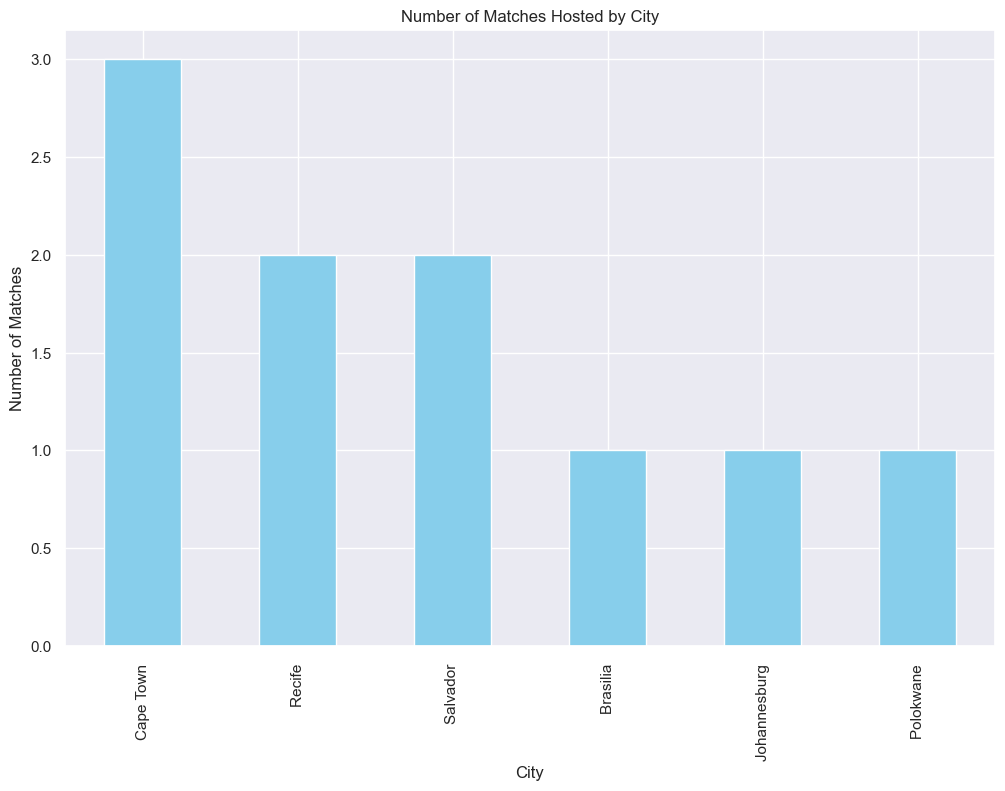

In [188]:
# Plotting the number of matches hosted by city
city_analysis['Number of Matches count'].sort_values(ascending=False).plot(kind='bar', figsize=(12, 8), color='skyblue')
plt.title('Number of Matches Hosted by City')
plt.xlabel('City')
plt.ylabel('Number of Matches')
plt.xticks(rotation=90)
plt.show()

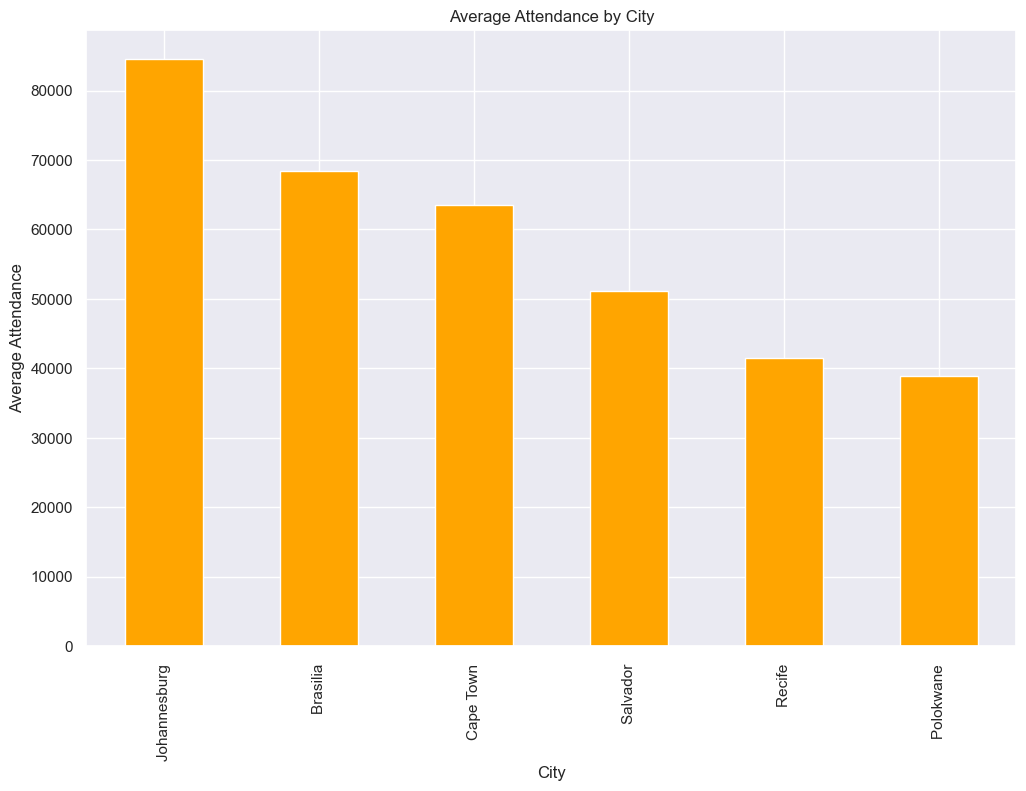

In [191]:
# Group by 'City' and calculate the mean attendance
city_attendance = df.groupby('City')['Attendance'].mean().sort_values(ascending=False)

# Plotting the average attendance by city
plt.figure(figsize=(12, 8))
city_attendance.plot(kind='bar', color='orange')
plt.title('Average Attendance by City')
plt.xlabel('City')
plt.ylabel('Average Attendance')
plt.xticks(rotation=90)
plt.show()

In [199]:
# Convert 'Half-time Home Goals' to integer if needed

# Calculate total and average half-time goals scored by home teams
total_half_time_home_goals = df['Half-time Home Goals'].sum()
average_half_time_home_goals = df['Half-time Home Goals'].mean()

# Determine how often home teams lead at half-time
home_lead_at_half_time = df[df['Half-time Home Goals'] > df['Half-time Away Goals']].shape[0]
total_matches = df.shape[0]
home_lead_percentage = (home_lead_at_half_time / total_matches) * 100

# Print the results
print(f"Total half-time goals scored by home teams: {total_half_time_home_goals}")
print(f"Average half-time goals per match by home teams: {average_half_time_home_goals:.2f}")
print(f"Home teams lead at half-time in {home_lead_at_half_time} out of {total_matches} matches ({home_lead_percentage:.2f}%)")

Total half-time goals scored by home teams: 1.0
Average half-time goals per match by home teams: 0.10
Home teams lead at half-time in 0 out of 10 matches (0.00%)


In [198]:
# Ensure 'Half-time Away Goals' is numeric
df['Half-time Away Goals'] = pd.to_numeric(df['Half-time Away Goals'], errors='coerce')

# Calculate total and average half-time goals scored by away teams
total_half_time_away_goals = df['Half-time Away Goals'].sum()
average_half_time_away_goals = df['Half-time Away Goals'].mean()

# Print the results
print(f"Total half-time goals scored by away teams: {total_half_time_away_goals}")
print(f"Average half-time goals per match by away teams: {average_half_time_away_goals:.2f}")


Total half-time goals scored by away teams: 3.0
Average half-time goals per match by away teams: 0.30


C:\Users\sudip\AppData\Local\Temp\ipykernel_17704\23292146.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Half-time Away Goals'] = pd.to_numeric(df['Half-time Away Goals'], errors='coerce')
